# 2A.ml - Classification binaire avec features textuelles - correction

Ce notebook propose de voir comment incorporer des features pour voir l'amélioration des performances sur une classification binaire. 

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [ ]:
%matplotlib inline

## Récupérer les données

Les données sont téléchargeables [Compétition 2017 - additifs alimentaires](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/questions/competition_2A.html#id1) ou encore avec le code :

In [ ]:
from pyensae.datasource import download_data
data_train = download_data("off_train_all.zip", 
                           url="http://www.xavierdupre.fr/enseignement/complements/")

In [ ]:
data_test = download_data("off_test_all.zip", 
                           url="http://www.xavierdupre.fr/enseignement/complements/")

In [ ]:
import pandas
df = pandas.read_csv("off_test_all.txt", sep="\t", encoding="utf8", low_memory=False)

In [ ]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,hasE,s100
0,1.008255e+10,http://world-fr.openfoodfacts.org/produit/0010...,usda-ndb-import,1489064583,2017-03-09T13:03:03Z,1489064583,2017-03-09T13:03:03Z,"Golden Island, Pork Jerky, Grilled Barbecue",NaN,NaN,...,NaN,NaN,NaN,NaN,23.0,23.0,NaN,NaN,False,17.0
1,1.182204e+10,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,1489070197,2017-03-09T14:36:37Z,1489070197,2017-03-09T14:36:37Z,"Big Fizz, Soda, Orange",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,7.0
2,2.548401e+10,http://world-fr.openfoodfacts.org/produit/0025...,usda-ndb-import,1489052024,2017-03-09T09:33:44Z,1489052024,2017-03-09T09:33:44Z,"Tofubaked Marinated Baked Tofu, Sesame Ginger",NaN,NaN,...,NaN,NaN,NaN,NaN,-2.0,-2.0,NaN,NaN,True,17.0
3,1.229250e+10,http://world-fr.openfoodfacts.org/produit/0012...,usda-ndb-import,1489133493,2017-03-10T08:11:33Z,1489133493,2017-03-10T08:11:33Z,Milk Chocolate Eggs,NaN,NaN,...,NaN,NaN,NaN,NaN,23.0,23.0,NaN,NaN,True,17.0
4,1.115054e+10,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,1489052892,2017-03-09T09:48:12Z,1489052892,2017-03-09T09:48:12Z,Fresh Polish Sausage,NaN,NaN,...,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN,True,17.0


## Exercice 1 : extraire un échantillon aléatoire

Les données sont volumineuses. Prenons un échantillon pour aller plus vite. On se sert de la méthode [sample](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html).

In [ ]:
sample = df.sample(n=10000)
sample.shape

(10000, 165)

## Exercice 2 : caler un premier modèle de classification binaire

Avec les variables numériques uniquement. La cible est la variable ``hasE``. On sélectionne les variables numériques et on cale un premier modèle et la variable ``hasE`` dont le type est booléen. On remplace les valeurs manquantes par zéro.

In [ ]:
sample_num = sample.select_dtypes((float, bool))
sample_num.shape

(10000, 110)

In [ ]:
X = sample_num.drop("hasE", axis=1).fillna(0)
Y = sample_num["hasE"]

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

On vérifie que le modèle fonctionne à peu près.

In [ ]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(Y, clf.predict(X))
conf

array([[4418,    1],
       [5581,    0]], dtype=int64)

Ca ne marche pas vraiment. On essaye avec une forêt d'arbres.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clrf = RandomForestClassifier()
clrf.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
conf = confusion_matrix(Y, clrf.predict(X))
conf

array([[4419,    0],
       [   4, 5577]], dtype=int64)

Beaucoup mieux. Les performances semblent incroyables mais il ne faut pas oublier qu'on évalue le modèle sur la base d'apprentissage. Essayons sur un autre échantillon aléatoire.

In [ ]:
sample2 = df.sample(n=10000)
sample2_num = sample2.select_dtypes((float, bool))
X2 = sample2_num.drop("hasE", axis=1).fillna(0)
Y2 = sample2_num["hasE"]
conf2 = confusion_matrix(Y2, clrf.predict(X2))
conf2

array([[4464,    0],
       [  26, 5510]], dtype=int64)

Pas si mal.

## Exercice 3 : tracer une courbe ROC

On trace la courbe ROC avec le second échantillon.

In [ ]:
from sklearn.metrics import roc_curve
y_proba = clrf.predict_proba(X2)
y_pred = clrf.predict(X2)
# y_pred est plein de booléen. Il faut les convertir en entier.
prob_pred = y_proba[:, 1]
fpr, tpr, th = roc_curve(Y2, prob_pred)

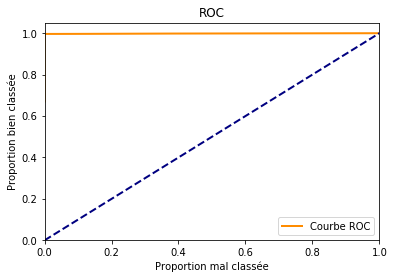

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='Courbe ROC')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Proportion mal classée")
plt.ylabel("Proportion bien classée")
plt.title('ROC')
plt.legend(loc="lower right")

La courbe [ROC](http://www.xavierdupre.fr/app/mlstatpy/helpsphinx/c_metric/roc.html) paraît fidèle à la matrice de confusion, on vérifie avec la distribution des scores.

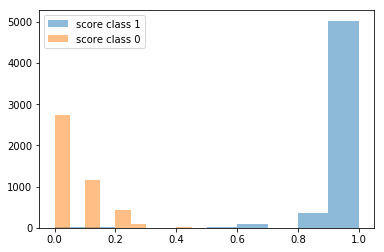

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.hist(y_proba[Y2==1, 1], alpha=0.5, label="score class 1")
ax.hist(y_proba[Y2==0, 1], alpha=0.5, label="score class 0")
ax.legend();

## Exercice 4 : utiliser la variable qui contient le pays

Est-ce que le modèle est plus performant ?

## Exercice 5 : utiliser la variable additives_tags ?

Les résultats ne vous paraissent-ils pas étranges ?

## Exercice 6 : utiliser la variable ingredients_text ?

Que suggérez vous *embedding* ?

## Exercice 7 : utiliser la variable product_name ?

## Exercice 8 : utiliser GridSearch pour optimiser un hyper-paramètre du modèle ?

## Exercice 9 : faites tourner une cross validation ?